In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [2]:
df = pd.read_csv('area_price_prediction.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


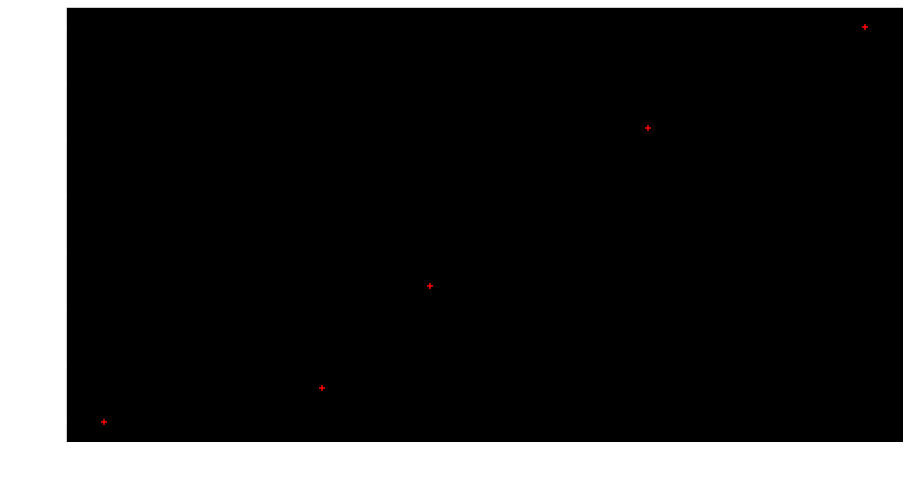

In [3]:
%matplotlib inline
plt.figure(figsize=(15,8))
plt.xlabel("Area(sq. ft)")
plt.ylabel("Price(USD)")
plt.scatter(df['area'], df['price'], marker='+', color='red')

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']].values, df['price'].values)

LinearRegression()

In [5]:
reg.predict([[3300]])

array([628715.75342466])

In [6]:
reg.intercept_, reg.coef_

(180616.43835616432, array([135.78767123]))

In [7]:
135.78767123*3300 + 180616.43835616473

628715.7534151648

In [8]:
reg.predict([[5000]])

array([859554.79452055])

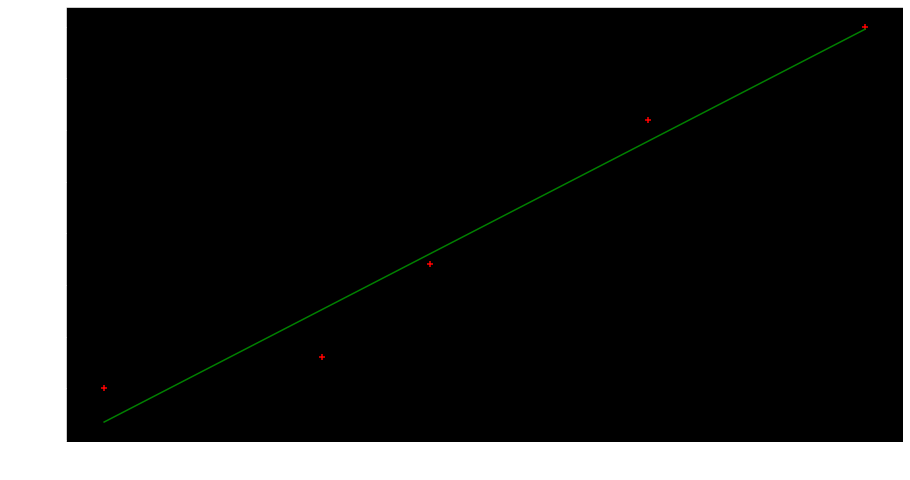

In [9]:
%matplotlib inline
plt.figure(figsize=(15,8))
plt.xlabel("Area(sq. ft)")
plt.ylabel("Price(USD)")
plt.scatter(df['area'], df['price'], marker='+', color='red')
plt.plot(df['area'], reg.predict(df[['area']].values), color='green')

In [10]:
df2 = pd.read_csv('areas.csv')
pred_price = reg.predict(df2[['area']].values)
df2['Predicted Price'] = pred_price
df2.to_csv('areas_predicted.csv', index=False)

<h1> Saving model using pickle </h1>

In [11]:
import pickle

In [12]:
with open('model_pickle', 'wb') as f:
    pickle.dump(reg,f)

In [14]:
with open('model_pickle', 'rb') as f:
    reg2 = pickle.load(f)

In [15]:
reg2.predict([[3300]])

array([628715.75342466])

<h1> Saving a model using joblib </h1>

In [16]:
import joblib

In [17]:
joblib.dump(reg, 'model_joblib')

['model_joblib']

In [18]:
reg_joblib = joblib.load('model_joblib')

In [19]:
reg_joblib.predict([[3300]])

array([628715.75342466])